#Memetic Algorithms (MA):
#Simple Memetic Algorithm:
Incorporates local search operators (e.g., hill climbing, gradient descent) into genetic algorithms to enhance exploitation.

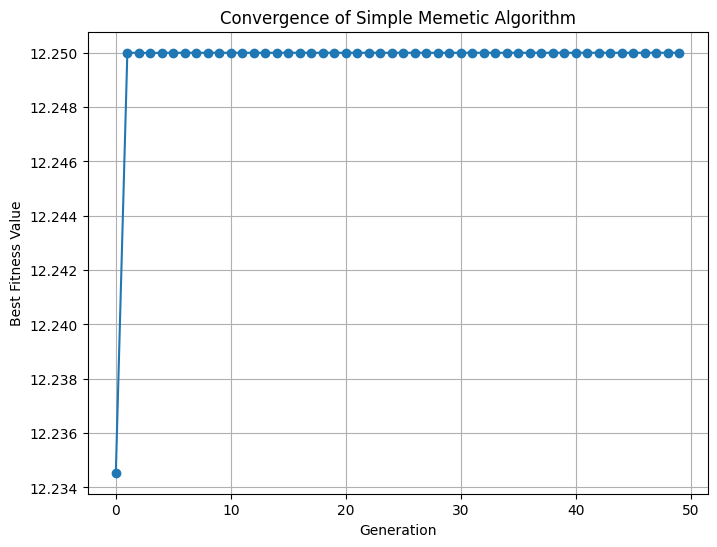

Best solution: 2.464690038767638, Best fitness: 12.24999999972884


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function (objective function)
def fitness_function(x):
    return -x**2 + 5*x + 6  # Example fitness function (maximize -x^2 + 5x + 6)

# Genetic Algorithm (GA) parameters
population_size = 50
num_generations = 50
crossover_rate = 0.8
mutation_rate = 0.1

# Local search (hill climbing) function
def hill_climbing(x):
    best_x = x
    best_fitness = fitness_function(x)

    # Perform hill climbing by iteratively searching for a better solution
    for _ in range(10):  # Perform 10 steps of hill climbing
        neighbor_x = best_x + np.random.normal(0, 0.5)  # Randomly perturb the current solution
        neighbor_fitness = fitness_function(neighbor_x)

        if neighbor_fitness > best_fitness:
            best_x = neighbor_x
            best_fitness = neighbor_fitness

    return best_x

# Initialize the population
population = np.random.uniform(-10, 10, size=population_size)

# Lists to store the best fitness value and corresponding solution for each generation
best_fitness_values = []
best_solutions = []

# Main loop for the Simple Memetic Algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_values = [fitness_function(individual) for individual in population]

    # Select individuals for reproduction (using tournament selection)
    selected_indices = np.random.choice(range(population_size), size=population_size, replace=True)
    selected_population = [population[idx] for idx in selected_indices]

    # Apply crossover and mutation
    offspring = []
    for i in range(0, population_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[i + 1]

        if np.random.rand() < crossover_rate:
            # Perform crossover to create new offspring
            alpha = np.random.uniform(0, 1)
            child1 = alpha * parent1 + (1 - alpha) * parent2
            child2 = alpha * parent2 + (1 - alpha) * parent1
        else:
            # If no crossover, offspring are copies of parents
            child1 = parent1
            child2 = parent2

        # Apply mutation to the offspring
        if np.random.rand() < mutation_rate:
            child1 += np.random.normal(0, 0.5)
        if np.random.rand() < mutation_rate:
            child2 += np.random.normal(0, 0.5)

        offspring.extend([child1, child2])

    # Apply hill climbing (local search) to the offspring
    population = [hill_climbing(individual) for individual in offspring]

    # Record the best fitness and corresponding solution in the current generation
    best_index = np.argmax(fitness_values)
    best_fitness_values.append(fitness_values[best_index])
    best_solutions.append(population[best_index])

# Plot the convergence of the best fitness value over generations
plt.figure(figsize=(8, 6))
plt.plot(range(num_generations), best_fitness_values, marker='o')
plt.title('Convergence of Simple Memetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

# Print the best solution found
best_solution_index = np.argmax(best_fitness_values)
best_solution = best_solutions[best_solution_index]
best_fitness = best_fitness_values[best_solution_index]
print(f"Best solution: {best_solution}, Best fitness: {best_fitness}")

#Population-based MA:
Utilizes a population of local optima to guide the global search process effectively.

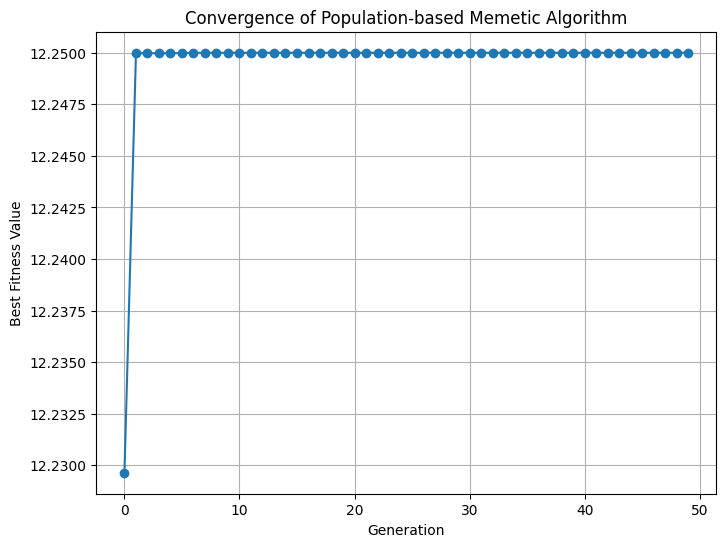

Best solution: 2.5001065607587094, Best fitness: 12.249999988644806


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function (objective function)
def fitness_function(x):
    return -x**2 + 5*x + 6  # Example fitness function (maximize -x^2 + 5x + 6)

# Local search (hill climbing) function
def hill_climbing(x):
    best_x = x
    best_fitness = fitness_function(x)

    # Perform hill climbing by iteratively searching for a better solution
    for _ in range(10):  # Perform 10 steps of hill climbing
        neighbor_x = best_x + np.random.normal(0, 0.5)  # Randomly perturb the current solution
        neighbor_fitness = fitness_function(neighbor_x)

        if neighbor_fitness > best_fitness:
            best_x = neighbor_x
            best_fitness = neighbor_fitness

    return best_x

# Population-based Memetic Algorithm (MA) parameters
num_local_optima = 10
num_generations = 50

# Initialize the population of local optima
local_optima = np.random.uniform(-10, 10, size=num_local_optima)

# Lists to store the best fitness value and corresponding solution for each generation
best_fitness_values = []
best_solutions = []

# Main loop for the Population-based Memetic Algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each local optimum (population member)
    fitness_values = [fitness_function(optimum) for optimum in local_optima]

    # Apply hill climbing (local search) to each local optimum
    local_optima = [hill_climbing(optimum) for optimum in local_optima]

    # Record the best fitness and corresponding solution in the current generation
    best_index = np.argmax(fitness_values)
    best_fitness_values.append(fitness_values[best_index])
    best_solutions.append(local_optima[best_index])

# Plot the convergence of the best fitness value over generations
plt.figure(figsize=(8, 6))
plt.plot(range(num_generations), best_fitness_values, marker='o')
plt.title('Convergence of Population-based Memetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

# Print the best solution found
best_solution_index = np.argmax(best_fitness_values)
best_solution = best_solutions[best_solution_index]
best_fitness = best_fitness_values[best_solution_index]
print(f"Best solution: {best_solution}, Best fitness: {best_fitness}")

#Variable Neighborhood Search (VNS) with Genetic Algorithms:
Integrates genetic algorithms with variable neighborhood search techniques to explore diverse neighborhoods of solutions.

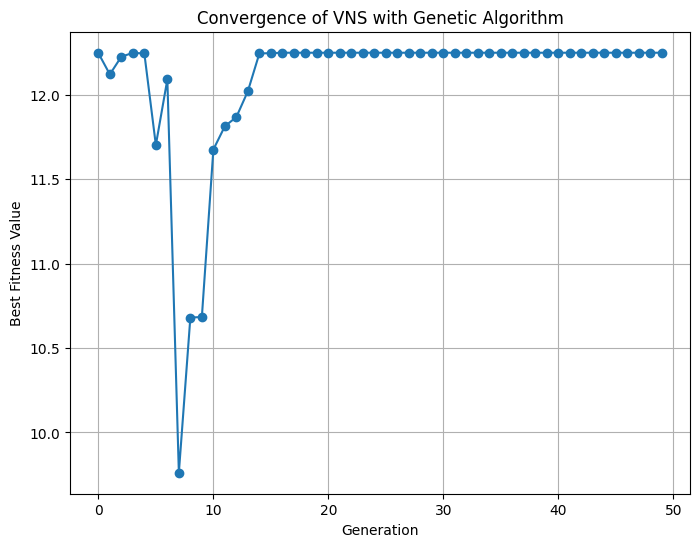

Best solution: [2.57133757], Best fitness: [12.25]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function (objective function)
def fitness_function(x):
    return -x**2 + 5*x + 6  # Example fitness function (maximize -x^2 + 5x + 6)

# Local search (neighborhood exploration) functions
def local_search(x, neighborhood_size):
    best_x = x
    best_fitness = fitness_function(x)

    # Explore multiple neighborhoods of the solution
    for _ in range(neighborhood_size):
        neighbor_x = x + np.random.normal(0, 0.5, size=len(x))  # Perturb the current solution
        neighbor_fitness = fitness_function(neighbor_x)

        if neighbor_fitness > best_fitness:
            best_x = neighbor_x
            best_fitness = neighbor_fitness

    return best_x

# Genetic Algorithm (GA) parameters
population_size = 50
num_generations = 50
crossover_rate = 0.8
mutation_rate = 0.1

# Variable Neighborhood Search (VNS) parameters
max_neighborhood_size = 3

# Initialize the population
population = np.random.uniform(-10, 10, size=(population_size, 1))

# Lists to store the best fitness value and corresponding solution for each generation
best_fitness_values = []
best_solutions = []

# Main loop for Variable Neighborhood Search with Genetic Algorithms
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_values = [fitness_function(individual) for individual in population]

    # Apply variable neighborhood search to each individual in the population
    for i in range(population_size):
        neighborhood_size = np.random.randint(1, max_neighborhood_size + 1)
        population[i] = local_search(population[i], neighborhood_size)

    # Select individuals for reproduction (using tournament selection)
    selected_indices = np.random.choice(range(population_size), size=population_size, replace=True)
    selected_population = [population[idx] for idx in selected_indices]

    # Apply crossover and mutation
    offspring = []
    for i in range(0, population_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[i + 1]

        if np.random.rand() < crossover_rate:
            # Perform crossover to create new offspring
            alpha = np.random.uniform(0, 1)
            child1 = alpha * parent1 + (1 - alpha) * parent2
            child2 = alpha * parent2 + (1 - alpha) * parent1
        else:
            # If no crossover, offspring are copies of parents
            child1 = parent1
            child2 = parent2

        # Apply mutation to the offspring
        if np.random.rand() < mutation_rate:
            child1 += np.random.normal(0, 0.5)
        if np.random.rand() < mutation_rate:
            child2 += np.random.normal(0, 0.5)

        offspring.extend([child1, child2])

    # Update the population with the new offspring
    population = np.array(offspring)

    # Record the best fitness and corresponding solution in the current generation
    best_index = np.argmax(fitness_values)
    best_fitness_values.append(fitness_values[best_index])
    best_solutions.append(population[best_index])

# Plot the convergence of the best fitness value over generations
plt.figure(figsize=(8, 6))
plt.plot(range(num_generations), best_fitness_values, marker='o')
plt.title('Convergence of VNS with Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

# Print the best solution found
best_solution_index = np.argmax(best_fitness_values)
best_solution = best_solutions[best_solution_index]
best_fitness = best_fitness_values[best_solution_index]
print(f"Best solution: {best_solution}, Best fitness: {best_fitness}")

#Coevolutionary Memetic Algorithm:
Employs multiple populations evolving in parallel, where each population specializes in improving a specific aspect of the solution.

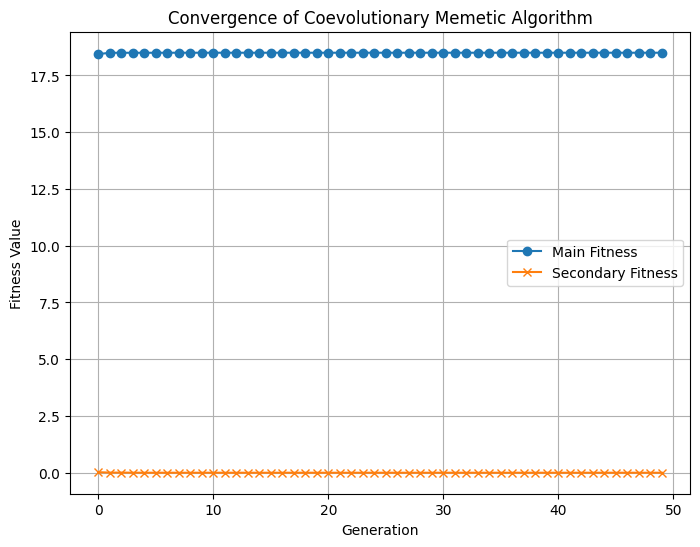

Best main fitness value: 18.499992672244268
Best secondary fitness value: 3.623284797289943e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the main fitness function (objective function)
def main_fitness_function(x, y):
    return -x**2 + 5*x - y**2 + 3*y + 10  # Example main fitness function (maximize -x^2 + 5x - y^2 + 3y + 10)

# Define the secondary fitness function (e.g., constraint)
def secondary_fitness_function(x, y):
    return (x - 2)**2 + (y - 1)**2  # Example secondary fitness function (minimize distance from (2, 1))

# Local search (hill climbing) function for main population
def hill_climbing_main(x, y):
    best_x, best_y = x, y
    best_fitness = main_fitness_function(x, y)

    # Perform hill climbing by iteratively searching for a better solution
    for _ in range(10):  # Perform 10 steps of hill climbing
        neighbor_x = best_x + np.random.normal(0, 0.5)
        neighbor_y = best_y + np.random.normal(0, 0.5)
        neighbor_fitness = main_fitness_function(neighbor_x, neighbor_y)

        if neighbor_fitness > best_fitness:
            best_x, best_y = neighbor_x, neighbor_y
            best_fitness = neighbor_fitness

    return best_x, best_y

# Local search (hill climbing) function for secondary population
def hill_climbing_secondary(x, y):
    best_x, best_y = x, y
    best_fitness = secondary_fitness_function(x, y)

    # Perform hill climbing by iteratively searching for a better solution
    for _ in range(10):  # Perform 10 steps of hill climbing
        neighbor_x = best_x + np.random.normal(0, 0.5)
        neighbor_y = best_y + np.random.normal(0, 0.5)
        neighbor_fitness = secondary_fitness_function(neighbor_x, neighbor_y)

        if neighbor_fitness < best_fitness:
            best_x, best_y = neighbor_x, neighbor_y
            best_fitness = neighbor_fitness

    return best_x, best_y

# Coevolutionary Memetic Algorithm parameters
num_generations = 50

# Initialize the main population and secondary population
main_population = np.random.uniform(-10, 10, size=(50, 2))
secondary_population = np.random.uniform(-10, 10, size=(50, 2))

# Lists to store the best fitness values and corresponding solutions for each generation
best_main_fitness_values = []
best_secondary_fitness_values = []

# Main loop for Coevolutionary Memetic Algorithm
for generation in range(num_generations):
    # Apply hill climbing (local search) to the main population
    main_population = np.array([hill_climbing_main(x, y) for x, y in main_population])

    # Apply hill climbing (local search) to the secondary population
    secondary_population = np.array([hill_climbing_secondary(x, y) for x, y in secondary_population])

    # Evaluate the fitness of the best solutions in each population
    main_fitness_values = [main_fitness_function(x, y) for x, y in main_population]
    secondary_fitness_values = [secondary_fitness_function(x, y) for x, y in secondary_population]

    # Record the best fitness values in each generation
    best_main_fitness_values.append(max(main_fitness_values))
    best_secondary_fitness_values.append(min(secondary_fitness_values))

# Plot the convergence of the best fitness values over generations
plt.figure(figsize=(8, 6))
plt.plot(range(num_generations), best_main_fitness_values, label='Main Fitness', marker='o')
plt.plot(range(num_generations), best_secondary_fitness_values, label='Secondary Fitness', marker='x')
plt.title('Convergence of Coevolutionary Memetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best solution found
best_main_index = np.argmax(best_main_fitness_values)
best_main_fitness = best_main_fitness_values[best_main_index]
print(f"Best main fitness value: {best_main_fitness}")

best_secondary_index = np.argmin(best_secondary_fitness_values)
best_secondary_fitness = best_secondary_fitness_values[best_secondary_index]
print(f"Best secondary fitness value: {best_secondary_fitness}")

#Adaptive Memetic Algorithm:
Dynamically adjusts the balance between exploration and exploitation by adapting local search intensities based on population characteristics.

Generation 1: Best Fitness = 12.248018822457059
Generation 2: Best Fitness = 12.249999687726987
Generation 3: Best Fitness = 12.249999687726987
Generation 4: Best Fitness = 12.249999687726987
Generation 5: Best Fitness = 12.249999687726987
Generation 6: Best Fitness = 12.249999984029149
Generation 7: Best Fitness = 12.249999984029149
Generation 8: Best Fitness = 12.249999984029149
Generation 9: Best Fitness = 12.249999984029149
Generation 10: Best Fitness = 12.249999984029149
Generation 11: Best Fitness = 12.249999984029149
Generation 12: Best Fitness = 12.249999984029149
Generation 13: Best Fitness = 12.249999984029149
Generation 14: Best Fitness = 12.249999984029149
Generation 15: Best Fitness = 12.249999984029149
Generation 16: Best Fitness = 12.249999984029149
Generation 17: Best Fitness = 12.249999984029149
Generation 18: Best Fitness = 12.249999984029149
Generation 19: Best Fitness = 12.249999984029149
Generation 20: Best Fitness = 12.249999984029149
Generation 21: Best Fitness =

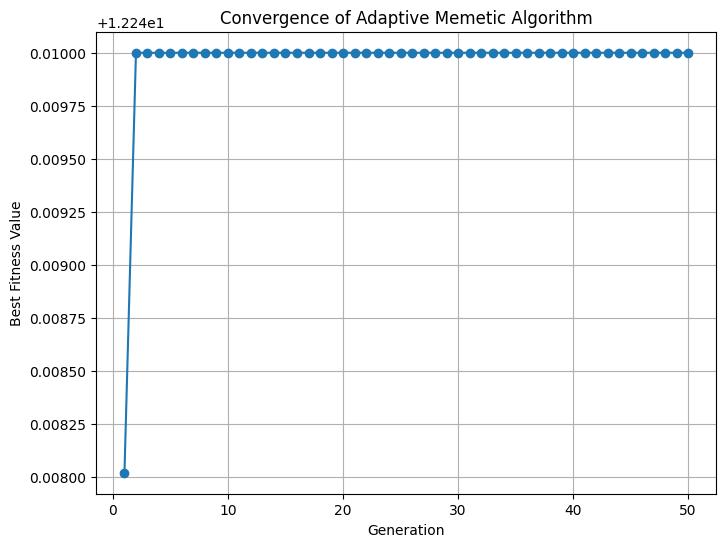


Best solution: 2.5000837047518627, Best fitness: 12.249999992993514


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function (objective function)
def fitness_function(x):
    return -x**2 + 5*x + 6  # Example fitness function (maximize -x^2 + 5x + 6)

# Local search (hill climbing) function with adaptive intensity
def adaptive_hill_climbing(x, intensity):
    best_x = x
    best_fitness = fitness_function(x)

    # Perform hill climbing with adaptive intensity
    for _ in range(intensity):
        neighbor_x = best_x + np.random.normal(0, 0.5)  # Perturb the current solution
        neighbor_fitness = fitness_function(neighbor_x)

        if neighbor_fitness > best_fitness:
            best_x = neighbor_x
            best_fitness = neighbor_fitness

    return best_x

# Adaptive Memetic Algorithm parameters
population_size = 50
num_generations = 50
max_local_search_intensity = 20
exploration_threshold = 0.5  # Threshold to determine when to increase local search intensity

# Initialize the population
population = np.random.uniform(-10, 10, size=population_size)

# Lists to store the best fitness value and corresponding solution for each generation
best_fitness_values = []
best_solutions = []

# Main loop for Adaptive Memetic Algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_values = [fitness_function(individual) for individual in population]

    # Determine the average fitness of the population
    avg_fitness = np.mean(fitness_values)

    # Calculate the local search intensity based on population characteristics
    if avg_fitness < exploration_threshold:
        local_search_intensity = max_local_search_intensity  # Increase intensity for exploration
    else:
        local_search_intensity = 1  # Decrease intensity for exploitation

    # Apply adaptive hill climbing (local search) to each individual in the population
    population = [adaptive_hill_climbing(individual, local_search_intensity) for individual in population]

    # Record the best fitness and corresponding solution in the current generation
    best_index = np.argmax(fitness_values)
    best_fitness_values.append(fitness_values[best_index])
    best_solutions.append(population[best_index])

    # Print current generation's best fitness value
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness_values[-1]}")

# Plot the convergence of the best fitness value over generations
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_generations + 1), best_fitness_values, marker='o')
plt.title('Convergence of Adaptive Memetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

# Print the best solution found
best_solution_index = np.argmax(best_fitness_values)
best_solution = best_solutions[best_solution_index]
best_fitness = best_fitness_values[best_solution_index]
print(f"\nBest solution: {best_solution}, Best fitness: {best_fitness}")